# Code to reproduce Figure 6

In [1]:
import obspy
import glob
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['font.family'] = ['Arial']

In [2]:
class PickComparison:
    def __init__(self):
        self.station = ''
        self.phase = ''
        self.channel = ''
        self.common = []
        self.common_cat = []
        self.common_timediff = []

## Pick differences

In [3]:
import pickle
with open('filtered_results/tm_ml_common_filtered.txt', 'rb') as f:
    comparisons = pickle.load(f)

In [4]:
p_timediffs = []
s_timediffs = []
for comp in comparisons:
    if comp.phase=='P':
        p_timediffs.extend([c.total_seconds() for c in comp.common_timediff])
    elif comp.phase=='S':
        s_timediffs.extend([c.total_seconds() for c in comp.common_timediff])

## Magnitudes: Get list of all common events over each station/phase combo, remove duplicates

In [5]:
import pickle
with open('filtered_results/original_common_filtered.txt', 'rb') as f:
    comparisons = pickle.load(f)

In [6]:
tm_cat = obspy.core.event.catalog.Catalog()
ml_cat = obspy.core.event.catalog.Catalog()
tm_cat_ids = []
ml_cat_ids = []
for c in comparisons:
    for ev in c.tm_cat:
        if ev.resource_id.id in tm_cat_ids:
            continue
        else:
            tm_cat_ids.append(ev.resource_id.id)
            tm_cat.append(ev)
    for ev in c.ml_cat:
        if ev.resource_id.id in ml_cat_ids:
            continue
        else:
            ml_cat_ids.append(ev.resource_id.id)
            ml_cat.append(ev)

In [7]:
tm_mags = []
for ev in tm_cat:
    if len(ev.magnitudes):
        tm_mags.append(ev.magnitudes[0].mag)
ml_mags = []
for ev in ml_cat:
    if len(ev.magnitudes):
        ml_mags.append(ev.magnitudes[0].mag)

## Plot all together

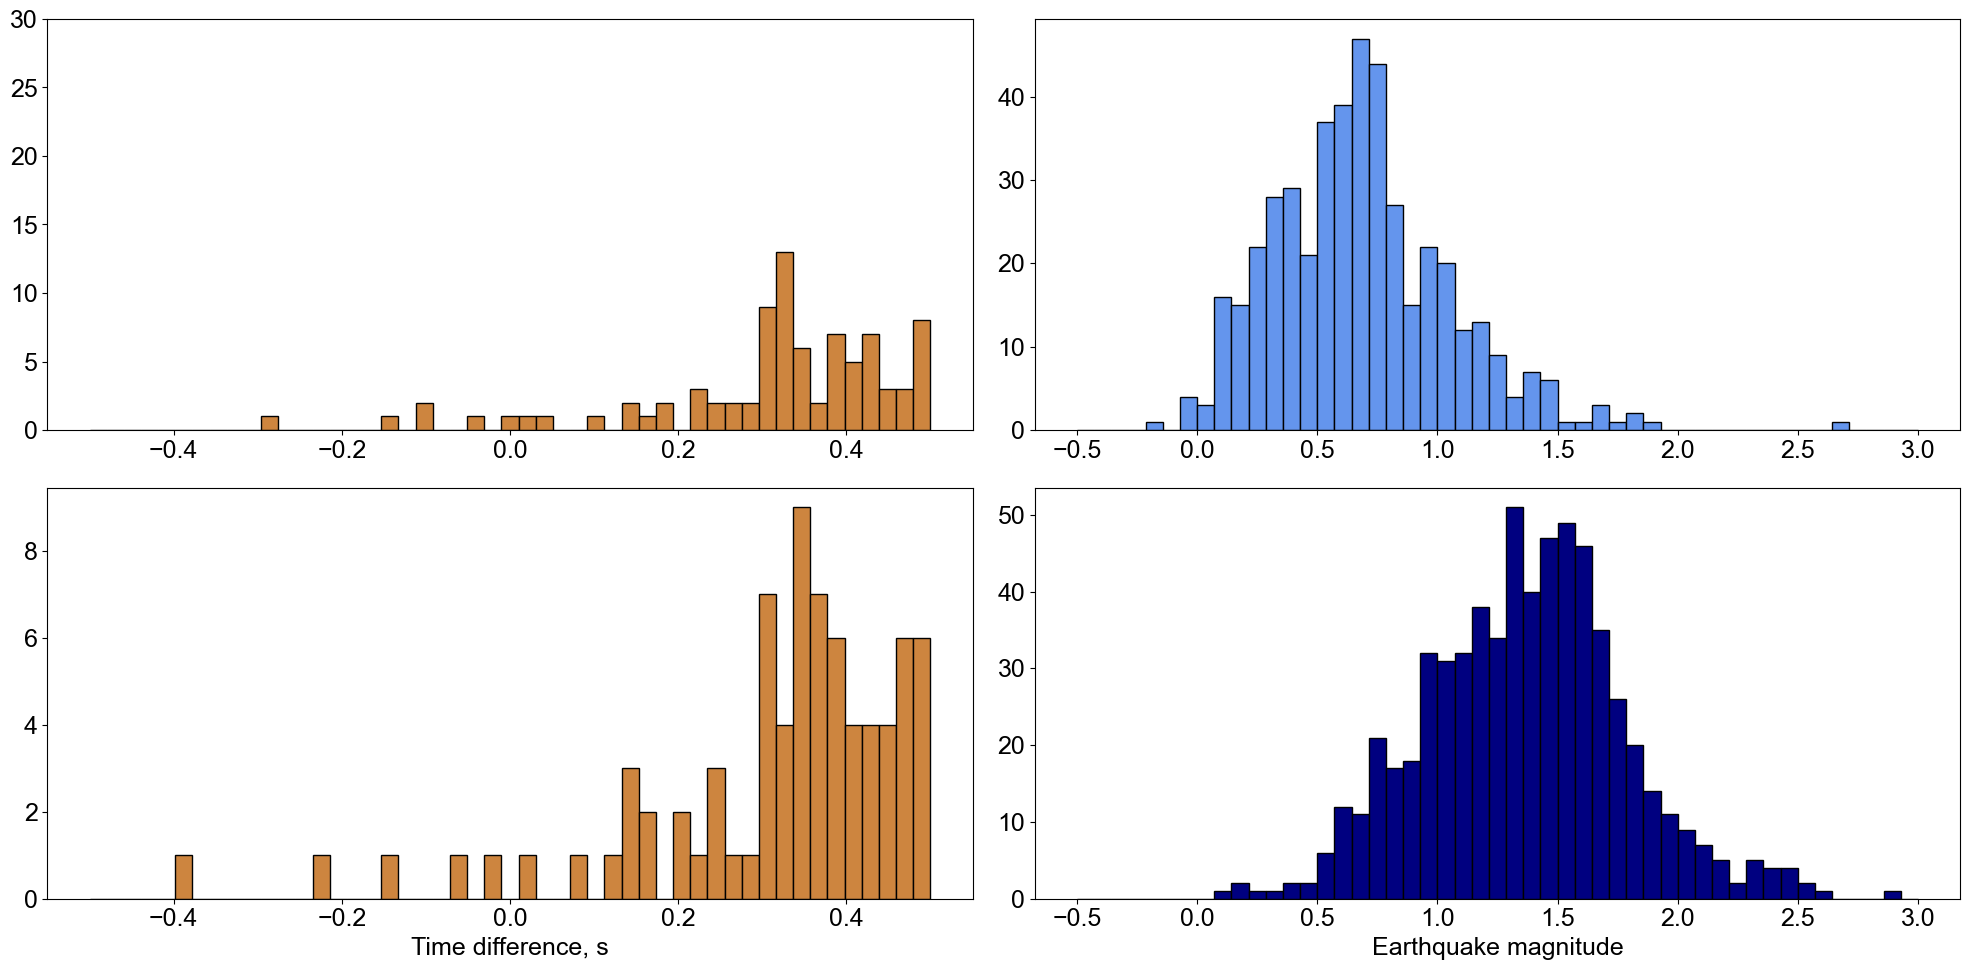

In [8]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

# Pick time differences
bins = np.linspace(-0.5,0.5,50)

ax[0,0].hist(p_timediffs,bins,edgecolor='black',facecolor='peru');
#ax[0,0].set_title('P-wave picks, TM - EQT')
ax[0,0].set_ylim(0,30)
#ax[0,0].set_xlabel('Time difference, s')

ax[1,0].hist(s_timediffs,bins,edgecolor='black',facecolor='peru');
#ax[1,0].set_title('S-wave picks, TM - EQT')
ax[1,0].set_xlabel('Time difference, s')

# Magnitudes
bins = np.linspace(-0.5,3,50)

ax[0,1].hist(tm_mags,bins,edgecolor='black',facecolor='cornflowerblue');
#ax[0,1].set_title('Template matching')
#ax[0,1].set_xlabel('Earthquake magnitude')

ax[1,1].hist(ml_mags,bins,edgecolor='black',facecolor='navy');
#ax[1,1].set_title('EQTransformer')
ax[1,1].set_xlabel('Earthquake magnitude')

fig.tight_layout(pad=1.0)
matplotlib.rcParams.update({'font.size': 24})